In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving fake_train.csv to fake_train.csv


In [ ]:
# Creating a dataframe
data = pd.read_csv("fake_train.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
None


In [ ]:
data. head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# Shape of the data frame
data.shape

(20800, 5)

In [ ]:
# Check for null values
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# Removing null values
data = data.dropna()

## Data Preprocessing


###### 1) Converting text into lowercase

The text in data is converted to lowercase because the the stopwords library(**sw_nltk-printed** in text processing section) is in lowercase. Therefore to accurately remove stopwords from features, the entire textual data in news article's title and text is converted to lower case.


In [ ]:
# Convert text in title to lowercase
data['title'] = data['title'].str.lower()

In [ ]:
data['title']

0        house dem aide: we didn’t even see comey’s let...
1        flynn: hillary clinton, big woman on campus - ...
2                        why the truth might get you fired
3        15 civilians killed in single us airstrike hav...
4        iranian woman jailed for fictional unpublished...
                               ...                        
20795    rapper t.i.: trump a ’poster child for white s...
20796    n.f.l. playoffs: schedule, matchups and odds -...
20797    macy’s is said to receive takeover approach by...
20798    nato, russia to hold parallel exercises in bal...
20799                            what keeps the f-35 alive
Name: title, Length: 18285, dtype: object

In [ ]:
# Convert news text to lowercase
data['text'] = data['text'].str.lower()

In [ ]:
data['text']

0        house dem aide: we didn’t even see comey’s let...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29, ...
3        videos 15 civilians killed in single us airstr...
4        print \nan iranian woman has been sentenced to...
                               ...                        
20795    rapper t. i. unloaded on black celebrities who...
20796    when the green bay packers lost to the washing...
20797    the macy’s of today grew from the union of sev...
20798    nato, russia to hold parallel exercises in bal...
20799      david swanson is an author, activist, journa...
Name: text, Length: 18285, dtype: object

#### 2) Removing stopwords from text


In [ ]:
# Download library of stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw_nltk = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Checking Stop words
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#Removing stop words from title
data['title_without_stopwords'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw_nltk)]))
print(data)

          id                                              title  \
0          0  house dem aide: we didn’t even see comey’s let...   
1          1  flynn: hillary clinton, big woman on campus - ...   
2          2                  why the truth might get you fired   
3          3  15 civilians killed in single us airstrike hav...   
4          4  iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  rapper t.i.: trump a ’poster child for white s...   
20796  20796  n.f.l. playoffs: schedule, matchups and odds -...   
20797  20797  macy’s is said to receive takeover approach by...   
20798  20798  nato, russia to hold parallel exercises in bal...   
20799  20799                          what keeps the f-35 alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [ ]:
#Removing stop words from text
data['text_without_stopwords'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw_nltk)]))


## BERT Word Embedding


In [ ]:
# Import BERT
from transformers import BertTokenizer

In [ ]:
# Importing bert-base tokenizer, which has 13 layes(12 output and 1 input)
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Apply tokenizer to the data frame[title]
tokenized_title = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:510] + ['[SEP]'], data['title_without_stopwords']))

In [ ]:
# Apply tokenizer to the data frame[author]
tokenized_author = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:510] + ['[SEP]'], data['author']))

In [ ]:
# Apply tokenizer to the data frame[text]
tokenized_text = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:510] + ['[SEP]'], data['text_without_stopwords']))

In [ ]:
# Indexing the tokenized dataframe[text]
indexed_text = list(map(tokenizer.convert_tokens_to_ids, tokenized_text))

In [ ]:
# Indexing the tokenized dataframe[title]
indexed_title = list(map(tokenizer.convert_tokens_to_ids, tokenized_title))

In [ ]:
# Indexing the tokenized dataframe[author]
indexed_author = list(map(tokenizer.convert_tokens_to_ids, tokenized_author))

In [ ]:
indexed_author[1100]

[101,
 14680,
 7257,
 4638,
 2586,
 16430,
 8380,
 1105,
 3895,
 143,
 27412,
 1424,
 19263,
 102]

In [ ]:
len(indexed_author)

18285

#### Applying padding

Padding is applied to the input features so that  each row(each input) provides same number of value to the classifier



In [ ]:
# Padding
# Full padding # 512 is the total capacity for BERT so utilizing it's full capacity
totalpadlength = 512

In [ ]:
# Apply padding to tokenized dataframe[text]
index_padded_text = np.array([xi+[0]*(totalpadlength-len(xi)) for xi in indexed_text])

In [ ]:
# Apply padding to tokenized dataframe[title]
index_padded_title = np.array([xi+[0]*(totalpadlength-len(xi)) for xi in indexed_title])

In [ ]:
# Apply padding to tokenized dataframe[author]
index_padded_author = np.array([xi+[0]*(totalpadlength-len(xi)) for xi in indexed_author])

In [ ]:
index_padded_author

array([[  101, 25815, 13174, ...,     0,     0,     0],
       [  101,  2979,   147, ...,     0,     0,     0],
       [  101, 25222,  1673, ...,     0,     0,     0],
       ...,
       [  101,  1847,   147, ...,     0,     0,     0],
       [  101,  3230,  1760, ...,     0,     0,     0],
       [  101,  1681, 11956, ...,     0,     0,     0]])

In [ ]:
index_padded_author.shape

(18285, 512)

In [ ]:
# Feature type [title, text, author]
index_padded_1 = np.concatenate((index_padded_text,index_padded_title,index_padded_author),axis=1)

In [ ]:
index_padded_1.shape

(18285, 1536)

## Dimensionality Reduction

In [ ]:
# Importing library
from sklearn.decomposition import PCA

In [ ]:
# Reducing number of components to 30 for Features
principal=PCA(n_components=30)
principal.fit(index_padded_1)
x1=principal.transform(index_padded_1)

In [ ]:
x1.shape

(18285, 30)

In [ ]:
x1

array([[ 33113.10717194,   2255.93048993,    483.96017449, ...,
        -14977.46981591,   -935.70014186,  -3801.90366798],
       [ 29522.92724914,   -239.4887624 ,  -7169.30488769, ...,
         -5747.78893687,   4074.02179415,   6443.70618652],
       [ 18519.89471256, -13577.04866024,  -7657.33259516, ...,
          6388.64274649, -16019.27628186,   2128.25598714],
       ...,
       [ 27450.57444902,  -3763.57012562,  -4452.17380081, ...,
           776.47208389,  16686.5499039 ,   3482.77506983],
       [-10423.85984925,  50790.43440142, -13308.03187659, ...,
         13292.42559307,  -3667.89036532,  -8878.7132704 ],
       [  7263.01511979, -24772.10684666,  -6398.87250884, ...,
         -2757.51735819,  -2298.57763072,  15259.35226725]])

In [ ]:
# Label values
Y = data['label'].values
Y

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
Y.shape

(18285,)

### Splitting data into training and test data for features and labels

In [ ]:
# splitting data for Feature type 1
X_train, X_test, y_train, y_test = train_test_split(x1, Y,
                                                    test_size=0.1, random_state=42)

In [ ]:
X_train.shape

(16456, 30)

In [ ]:
y_train.shape

(16456,)

## Logistic Regression

In [ ]:
# Importing Libraries for ML Models
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

# Creating logistic Regression model and fitting data
LR_model = LogisticRegression(solver='lbfgs', max_iter=10000).fit(X_train, y_train)
# Predicting on model
y_pred_LR1 = LR_model.predict(X_test)
# Calculating Accuracy
LR_accuracy_1 = accuracy_score(y_test, y_pred_LR1)
print('Accuracy for Logistic Regression: ',(np.round(LR_accuracy_1, decimals=4)), )
# Classification Report
print(sklearn.metrics.classification_report(y_test, y_pred_LR1))

Accuracy for Logistic Regression:  0.6944
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1036
           1       0.63      0.72      0.67       793

    accuracy                           0.69      1829
   macro avg       0.69      0.70      0.69      1829
weighted avg       0.70      0.69      0.70      1829



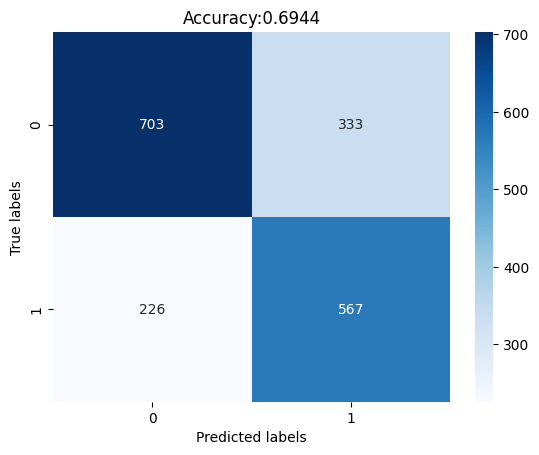

In [ ]:
# Confusion matrix to visualize the accuracy
ax= plt.subplot()
LR_clf = confusion_matrix(y_test, y_pred_LR1)
sns.heatmap(LR_clf, annot=True, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Accuracy:'+str(np.round(LR_accuracy_1, decimals=4)));

## RandomForest Classifier

In [ ]:
# Creating Random Forest model and fitting data
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(X_train, y_train)
# Predicting on model
y_pred_RF1 = RF_model.predict(X_test)
# Calculating Accuracy
RF_accuracy_1 = accuracy_score(y_test, y_pred_RF1)
print('Accuracy for Random Forest: ',(np.round(RF_accuracy_1, decimals=4)), " %")
# Classification Report
print(sklearn.metrics.classification_report(y_test, y_pred_RF1))

Accuracy for Random Forest:  0.7638  %
              precision    recall  f1-score   support

           0       0.76      0.86      0.80      1036
           1       0.78      0.64      0.70       793

    accuracy                           0.76      1829
   macro avg       0.77      0.75      0.75      1829
weighted avg       0.77      0.76      0.76      1829



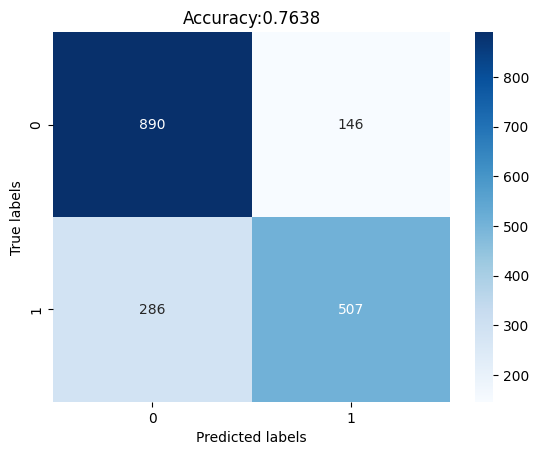

In [ ]:
# Confusion matrix to visualize the accuracy
ax= plt.subplot()
RF_clf = confusion_matrix(y_test, y_pred_RF1)
sns.heatmap(RF_clf, annot=True, cmap='Blues',ax=ax, fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Accuracy:'+str(np.round(RF_accuracy_1, decimals=4)));

## LSTM

In [ ]:
# Importing Libraries for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# Reshaped data for LSTM
X_train_new = X_train.reshape((X_train.shape[0],1, X_train.shape[1]))
X_test_new = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))

In [ ]:

X_train_new.shape

(16456, 1, 30)

In [ ]:
# Create model
model = Sequential()
model.add(LSTM(200, activation='sigmoid',input_shape=(1,30), return_sequences=True))
model.add(Dense(1, activation='sigmoid'))
model.add(LSTM(200, activation='sigmoid', return_sequences=True))
model.add(LSTM(100, activation='sigmoid', return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# predict on the model
model.fit(X_train_new,y_train, epochs = 100, batch_size = 64, verbose=0)
predval = model.predict(X_test_new).flatten()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 200)            184800    
                                                                 
 dense (Dense)               (None, 1, 1)              201       
                                                                 
 lstm_1 (LSTM)               (None, 1, 200)            161600    
                                                                 
 lstm_2 (LSTM)               (None, 100)               120400    
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 467102 (1.78 MB)
Trainable params: 467102 (1.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
58/58 [=============

In [ ]:
# Calculating Accuracy
y_hat = list(map(lambda x: 0 if x<0.5 else 1, predval))
from sklearn.metrics import accuracy_score
lstm_accuracy=accuracy_score(y_test, y_hat)
# Classification Report
print(sklearn.metrics.classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1036
           1       0.71      0.63      0.67       793

    accuracy                           0.73      1829
   macro avg       0.72      0.72      0.72      1829
weighted avg       0.73      0.73      0.72      1829



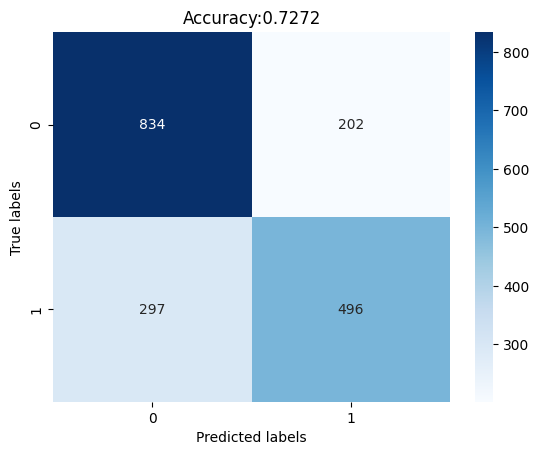

In [ ]:
# Confusion matrix to visualize the accuracy
ax= plt.subplot()
lstm_clf = confusion_matrix(y_test, y_hat)
sns.heatmap(lstm_clf, annot=True, cmap='Blues',ax=ax, fmt='g')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Accuracy:'+str(np.round(lstm_accuracy, decimals=4)));